In [4]:
# Import essential libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math as math
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
%matplotlib inline
sb.set()
plt.style.use('fivethirtyeight') 

# Decision Tree

In [5]:
games = pd.read_csv('games-prediction.csv', index_col= 0)
games.head()

,original_price,discount_price,discount_percentage,genre_Action,genre_Adventure,genre_Casual,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,...,Developer_PC3,Developer_PC4,Developer_PC5,Publisher_PC1,Publisher_PC2,Publisher_PC3,Publisher_PC4,Publisher_PC5,mature_content,status
0,19.99,14.99,25.012506,1,0,0,0,0,0,0,...,-0.006018,-0.007520,-0.005594,-0.051392,0.003178,-0.016121,-0.011612,-0.027166,False,good
1,29.99,29.99,0.000000,1,1,0,1,0,0,0,...,-0.004263,-0.005300,-0.003524,-0.045827,0.002767,-0.008356,-0.005268,-0.011944,True,bad
2,39.99,39.99,0.000000,1,1,0,0,0,0,0,...,-0.004424,-0.005508,-0.003715,-0.053120,0.003310,-0.022163,-0.016792,-0.040502,False,good
3,44.99,44.99,0.000000,1,1,0,1,0,0,0,...,-0.005299,-0.006671,-0.005675,-0.047767,0.002908,-0.010244,-0.006615,-0.015094,False,bad
4,0.00,0.00,0.000000,1,0,0,1,1,0,0,...,-0.004424,-0.005508,-0.003715,-0.046005,0.002780,-0.008505,-0.005372,-0.012186,False,good


[Text(0.6380746384297521, 0.9545454545454546, 'genre_Massively Multiplayer <= 0.5\ngini = 0.454\nsamples = 9321\nvalue = [3242, 6079]\nclass = good'),
 Text(0.40035296143250687, 0.8636363636363636, 'genre_Simulation <= 0.5\ngini = 0.445\nsamples = 8869\nvalue = [2958, 5911]\nclass = good'),
 Text(0.26949896694214875, 0.7727272727272727, 'discount_price <= 3.245\ngini = 0.426\nsamples = 6710\nvalue = [2068, 4642]\nclass = good'),
 Text(0.153150826446281, 0.6818181818181818, 'Developer_PC1 <= -0.017\ngini = 0.458\nsamples = 2312\nvalue = [820, 1492]\nclass = good'),
 Text(0.06508264462809918, 0.5909090909090909, 'genre_Adventure <= 0.5\ngini = 0.391\nsamples = 364\nvalue = [97, 267]\nclass = good'),
 Text(0.024104683195592287, 0.5, 'Publisher_PC3 <= -0.052\ngini = 0.327\nsamples = 243\nvalue = [50, 193]\nclass = good'),
 Text(0.005509641873278237, 0.4090909090909091, 'Developer_PC5 <= -0.006\ngini = 0.49\nsamples = 14\nvalue = [6, 8]\nclass = good'),
 Text(0.0027548209366391185, 0.318181

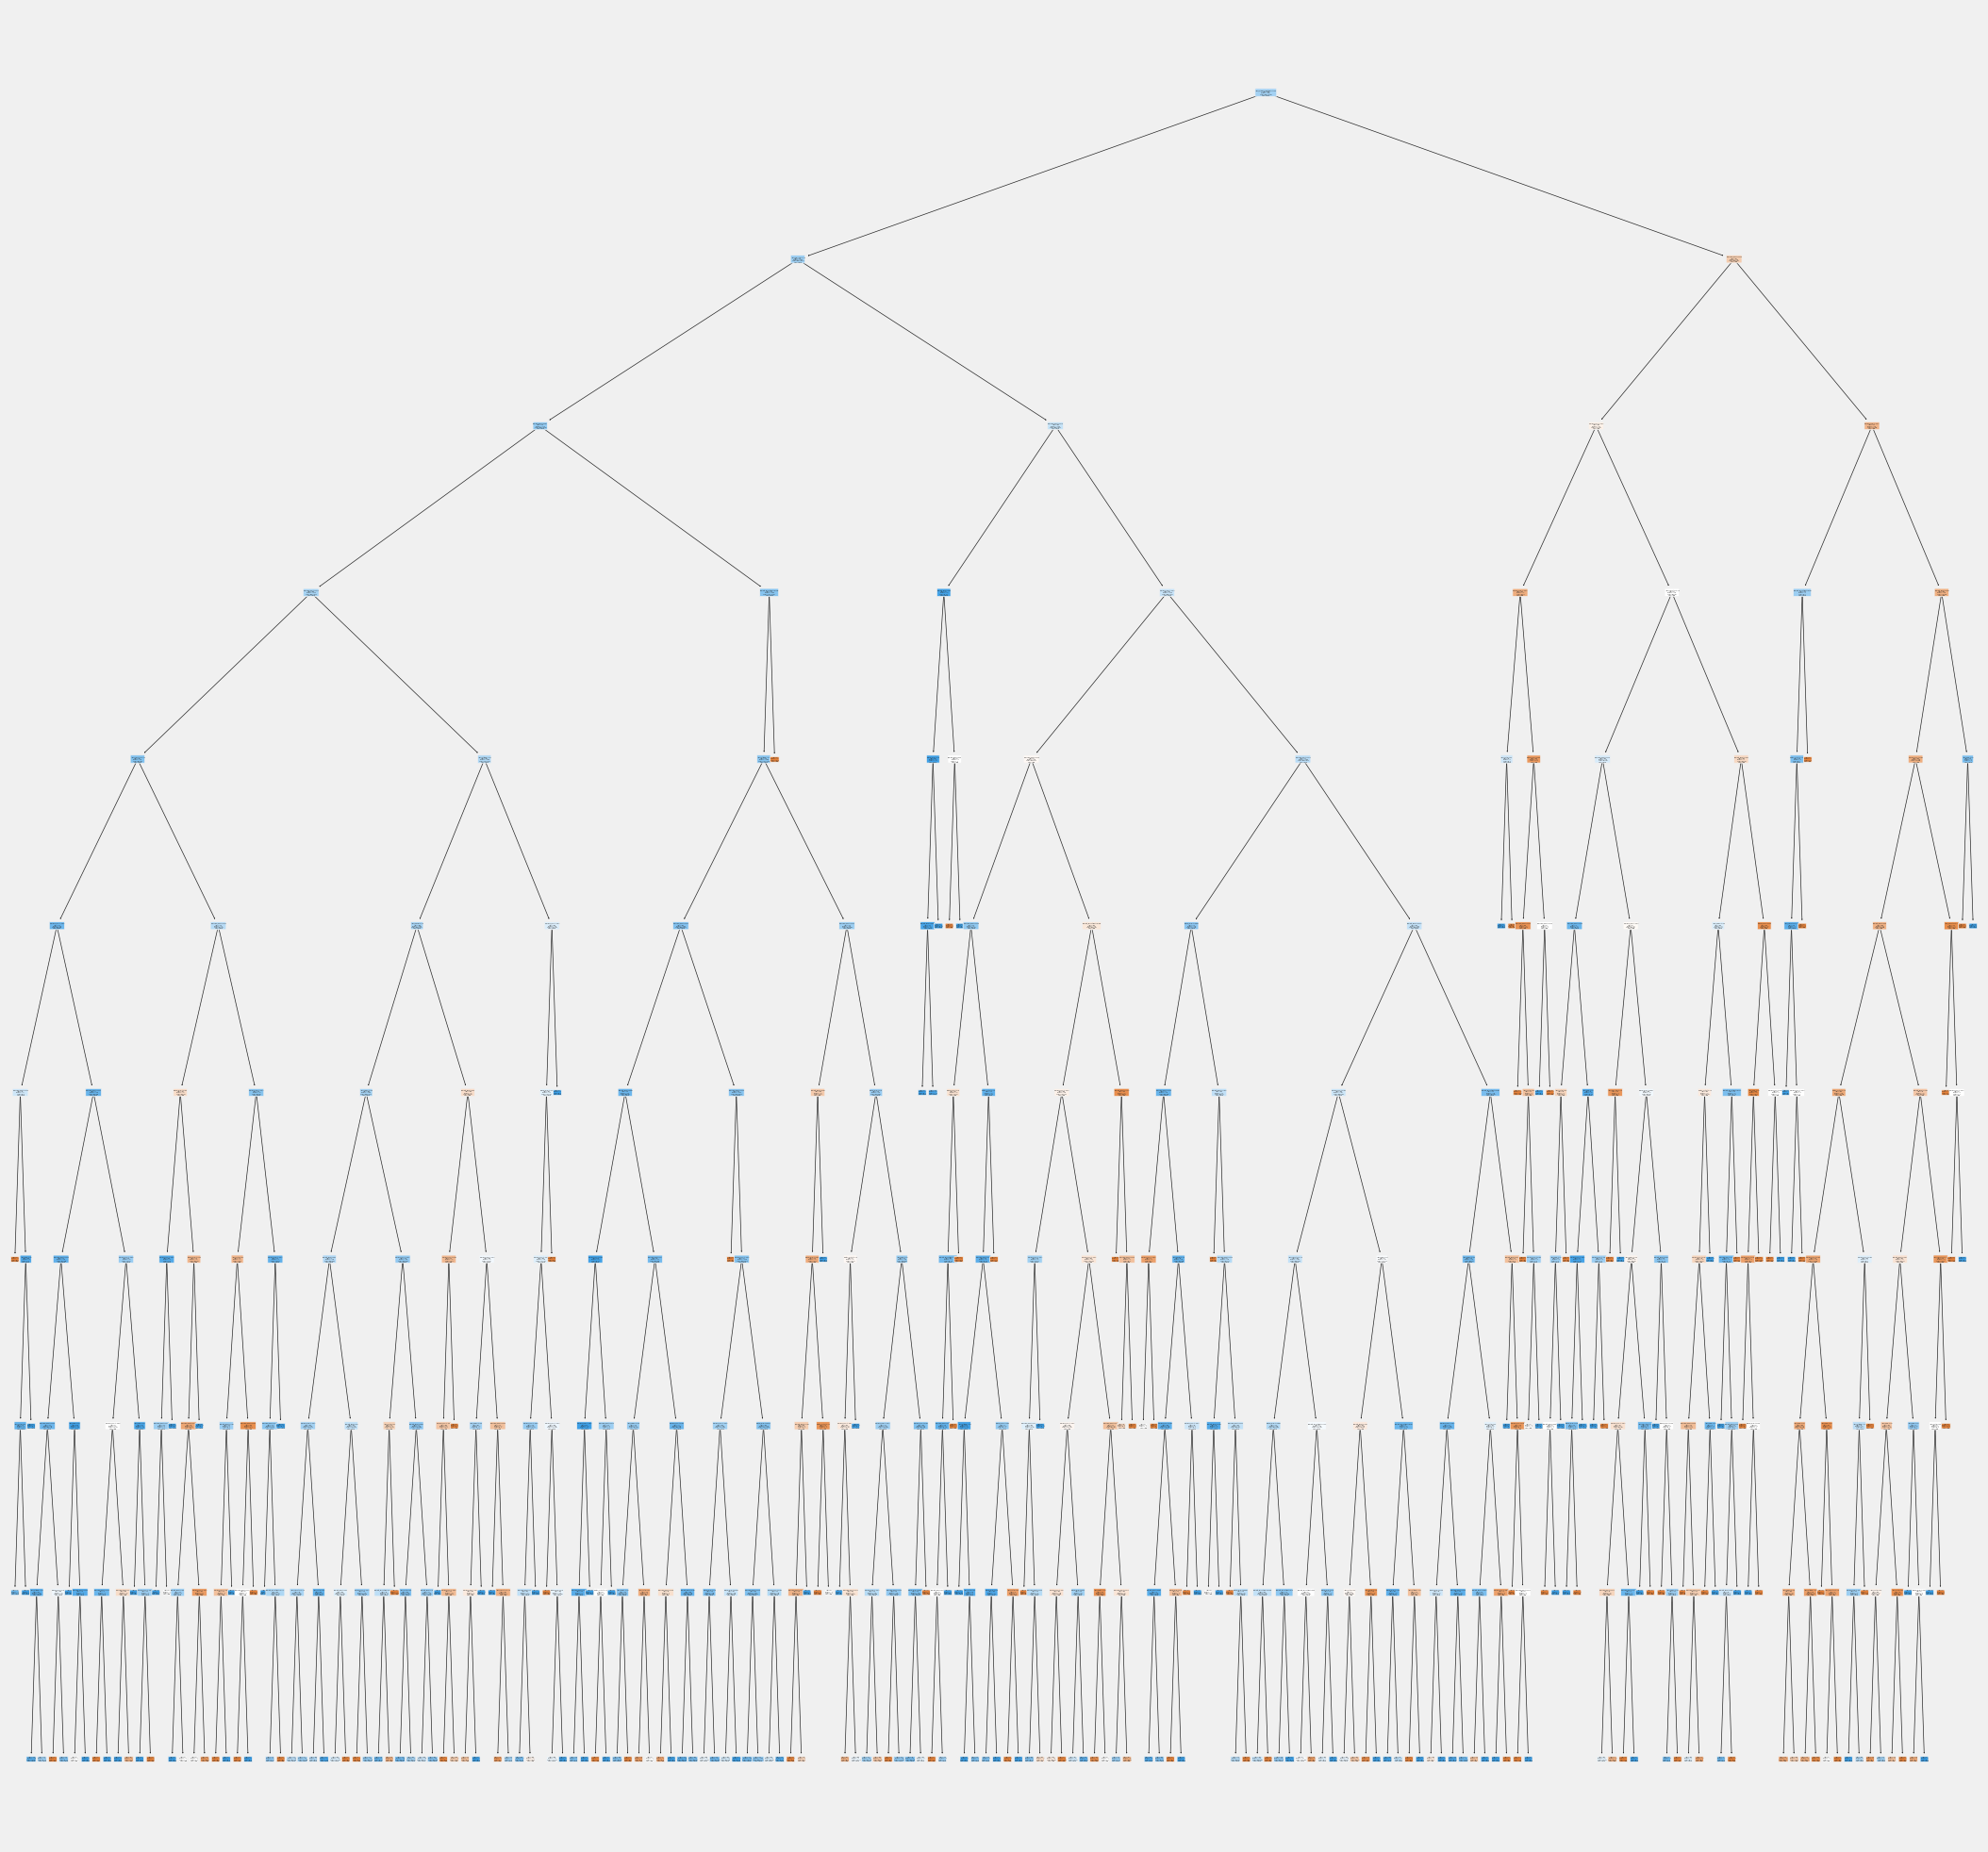

In [6]:
# Extract Response and Predictors
y = games['status']
X = games.drop('status', axis = 1)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 10)  
dectree.fit(X_train, y_train)                    

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["bad","good"])

Train Data
Accuracy  :	 0.709795086364124

TPR Train :	 0.9629873334430005
TNR Train :	 0.2350400987045034

FPR Train :	 0.7649599012954966
FNR Train :	 0.03701266655699951


<AxesSubplot:>

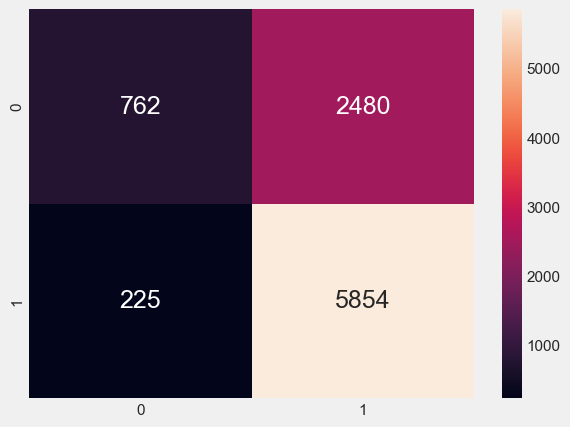

In [7]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.661947661947662

TPR Test :	 0.9197572488199596
TNR Test :	 0.21108490566037735

FPR Test :	 0.7889150943396226
FNR Test :	 0.08024275118004046


<AxesSubplot:>

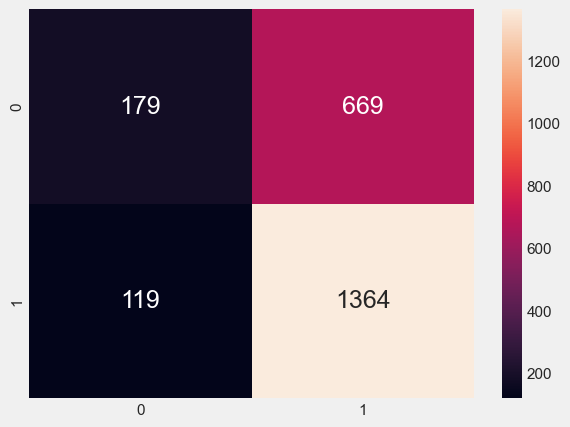

In [8]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

There is a huge imbalance in the *False Positives* and *False Negatives* in the confusion matrix. *False Positives* are much higher in number than *False Negatives* in both Train and Test data. This is a direct effect of the large `Good` vs `Bad` class imbalance in the response variable `Status`. As `Status = Good` was more likely in the data, *False Positives* are more likely too. This class imbalance is important to resolve as we do not want a biased model. Going back to our problem stated, of idenitfying good/bad games, an important part is on identifying potential bad games as to not let consumers waste money on them. Thus the predicition of bad games is important.

# Decision Tree - Oversampling

In [10]:
games = pd.read_csv('games-prediction-over-resampling.csv', index_col= 0)
games.head()

,original_price,discount_price,discount_percentage,genre_Action,genre_Adventure,genre_Casual,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,...,Developer_PC3,Developer_PC4,Developer_PC5,Publisher_PC1,Publisher_PC2,Publisher_PC3,Publisher_PC4,Publisher_PC5,mature_content,status
0,19.99,14.99,25.012506,1,0,0,0,0,0,0,...,-0.006018,-0.007520,-0.005594,-0.051392,0.003178,-0.016121,-0.011612,-0.027166,False,good
1,29.99,29.99,0.000000,1,1,0,1,0,0,0,...,-0.004263,-0.005300,-0.003524,-0.045827,0.002767,-0.008356,-0.005268,-0.011944,True,bad
2,39.99,39.99,0.000000,1,1,0,0,0,0,0,...,-0.004424,-0.005508,-0.003715,-0.053120,0.003310,-0.022163,-0.016792,-0.040502,False,good
3,44.99,44.99,0.000000,1,1,0,1,0,0,0,...,-0.005299,-0.006671,-0.005675,-0.047767,0.002908,-0.010244,-0.006615,-0.015094,False,bad
4,0.00,0.00,0.000000,1,0,0,1,1,0,0,...,-0.004424,-0.005508,-0.003715,-0.046005,0.002780,-0.008505,-0.005372,-0.012186,False,good


[Text(0.7130630966587113, 0.9545454545454546, 'genre_Massively Multiplayer <= 0.5\ngini = 0.494\nsamples = 10888\nvalue = [4867, 6021]\nclass = good'),
 Text(0.509621121718377, 0.8636363636363636, 'genre_Simulation <= 0.5\ngini = 0.49\nsamples = 10246\nvalue = [4396, 5850]\nclass = good'),
 Text(0.2649910501193317, 0.7727272727272727, 'discount_price <= 1.005\ngini = 0.48\nsamples = 7641\nvalue = [3047, 4594]\nclass = good'),
 Text(0.11701968973747016, 0.6818181818181818, 'discount_price <= 0.44\ngini = 0.497\nsamples = 1733\nvalue = [795, 938]\nclass = good'),
 Text(0.053102625298329355, 0.5909090909090909, 'Developer_PC1 <= -0.017\ngini = 0.489\nsamples = 1203\nvalue = [511, 692]\nclass = good'),
 Text(0.017303102625298328, 0.5, 'genre_Sports <= 0.5\ngini = 0.287\nsamples = 98\nvalue = [17, 81]\nclass = good'),
 Text(0.014916467780429593, 0.4090909090909091, 'Publisher_PC3 <= -0.01\ngini = 0.264\nsamples = 96\nvalue = [15, 81]\nclass = good'),
 Text(0.007159904534606206, 0.3181818181

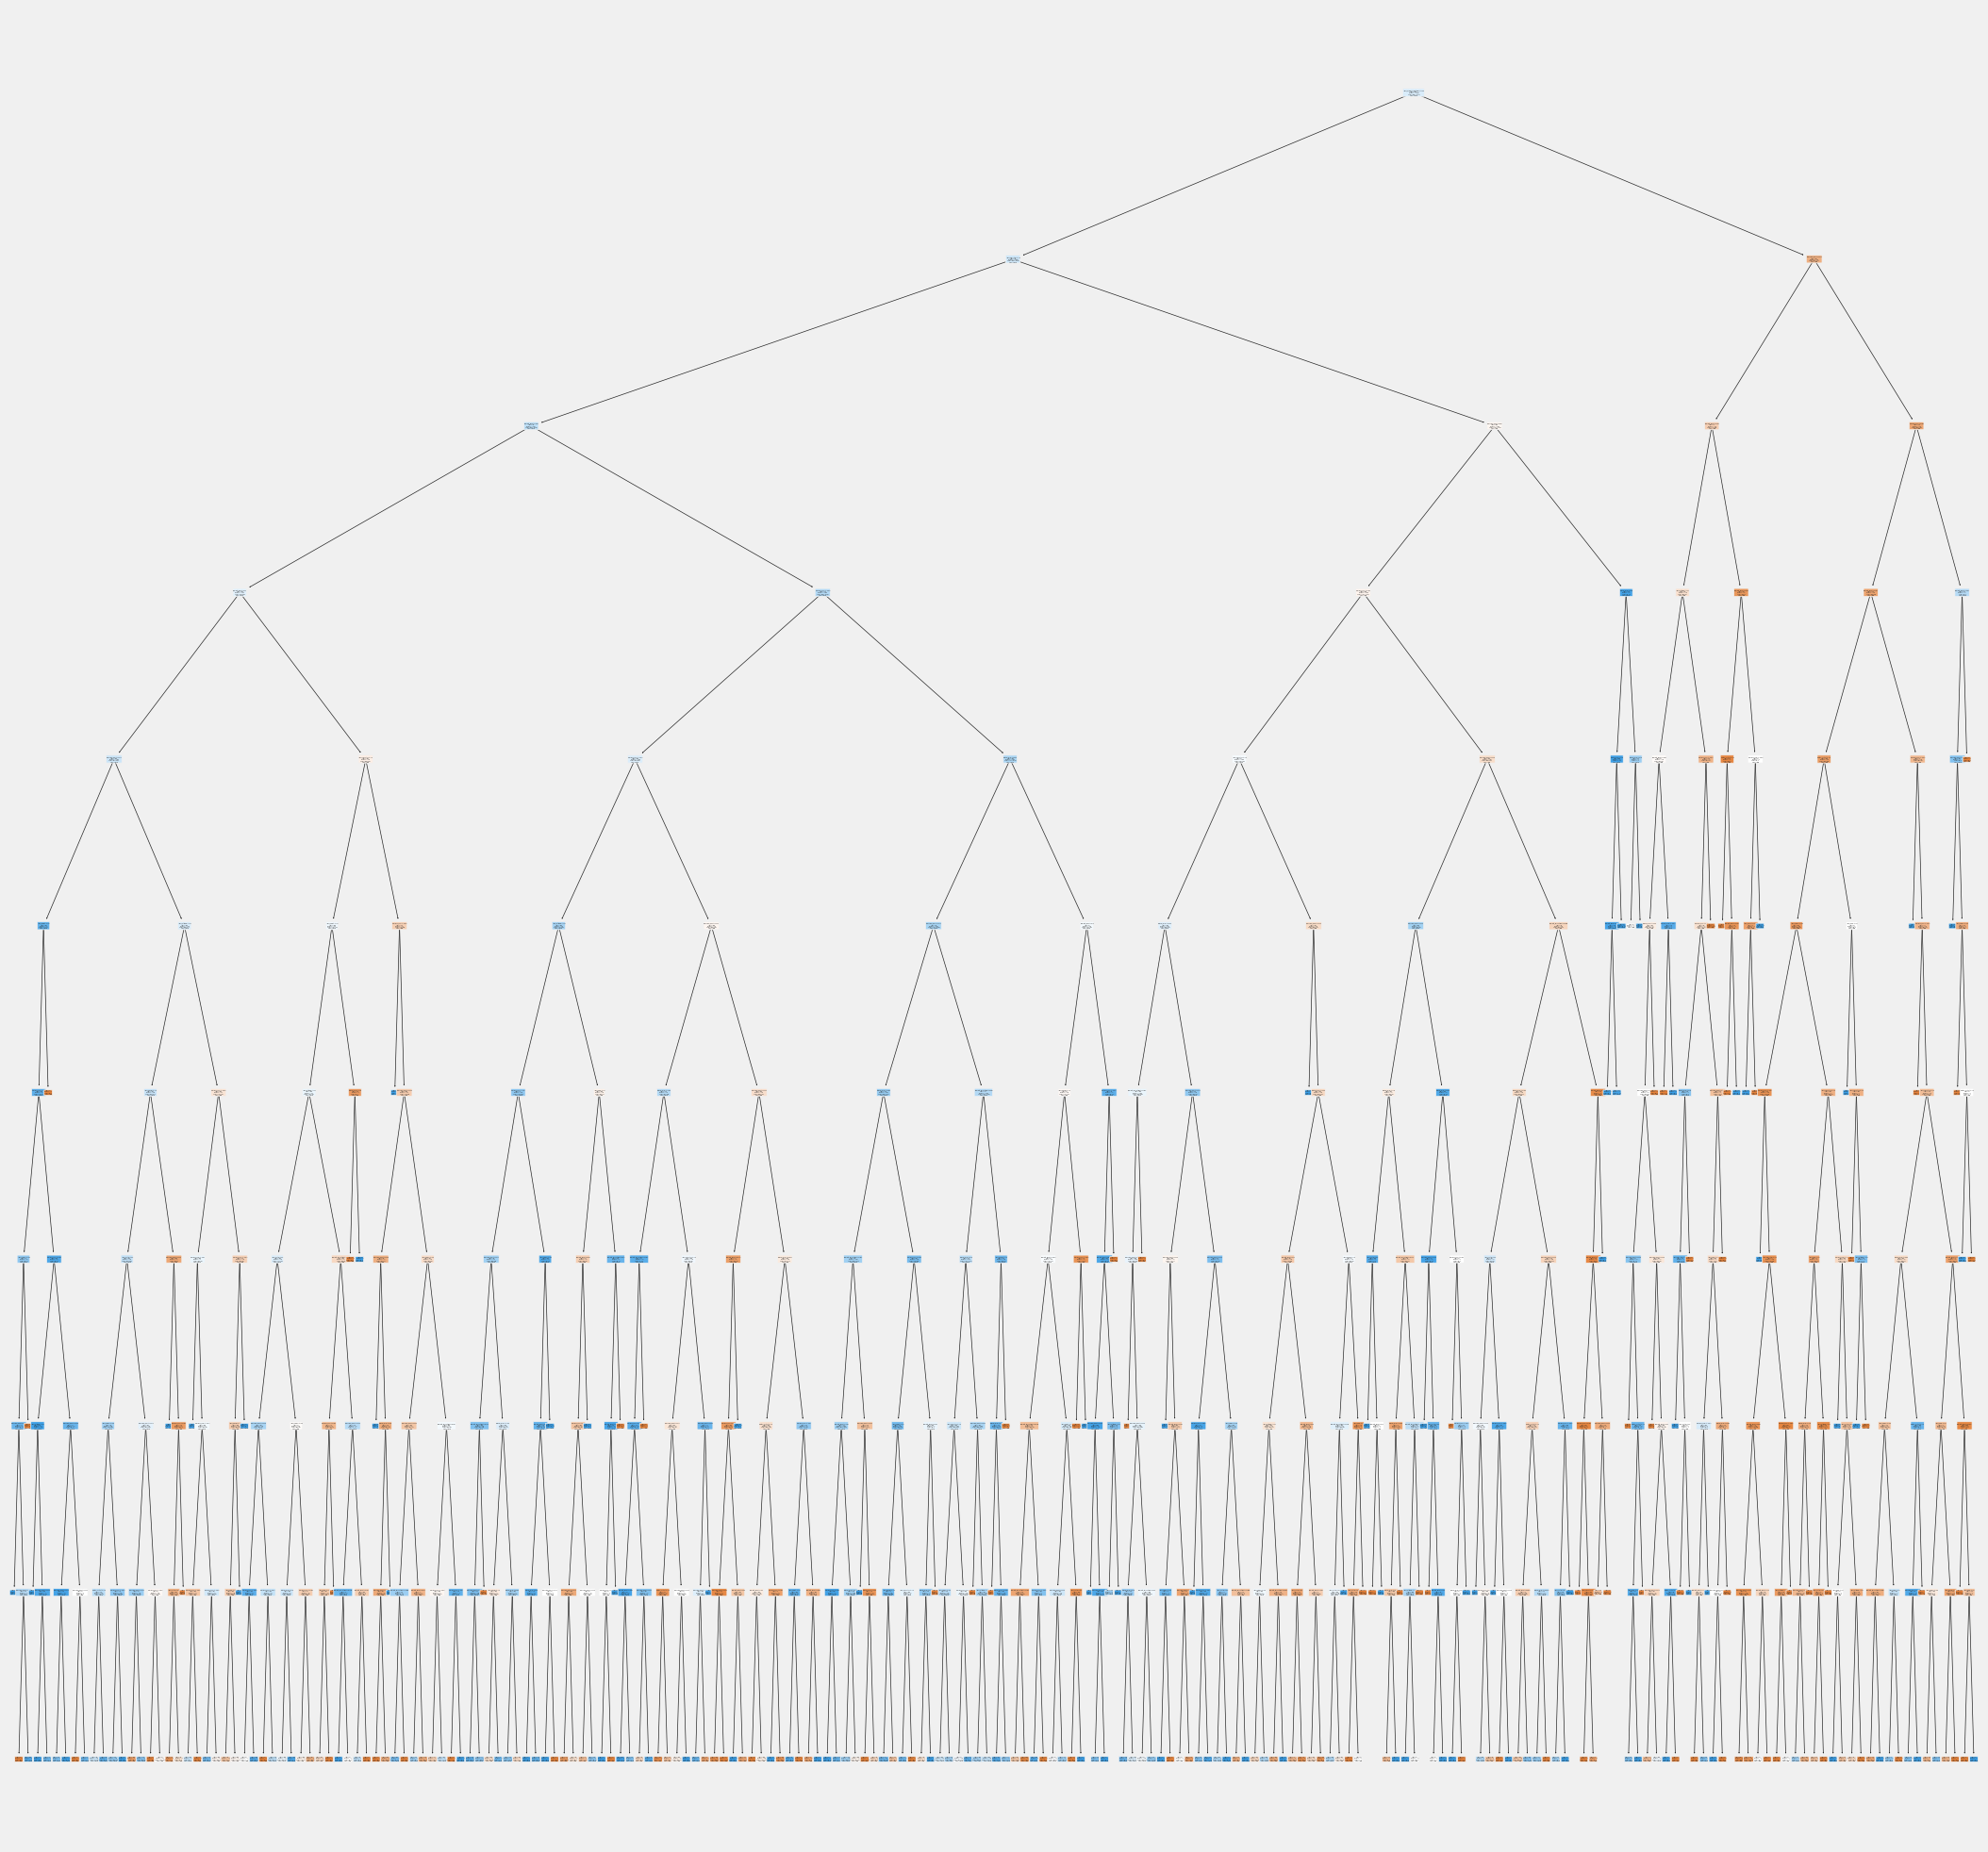

In [11]:
# Extract Response and Predictors
y = games['status']
X = games.drop('status', axis = 1)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 10)  
dectree.fit(X_train, y_train)                    

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["bad","good"])

Train Data
Accuracy  :	 0.6663299044819986

TPR Train :	 0.8242816807839229
TNR Train :	 0.4709266488596671

FPR Train :	 0.5290733511403328
FNR Train :	 0.17571831921607706


<AxesSubplot:>

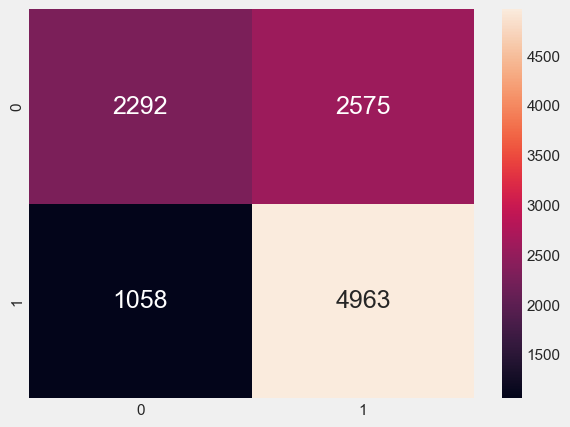

In [12]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.6136614028644877

TPR Test :	 0.7702790395846852
TNR Test :	 0.40947546531302875

FPR Test :	 0.5905245346869712
FNR Test :	 0.22972096041531473


<AxesSubplot:>

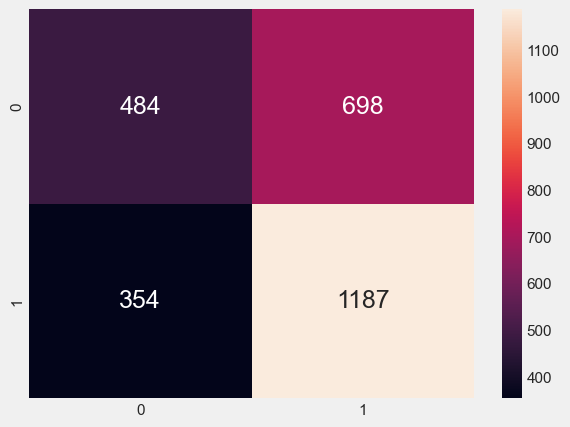

In [13]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

# Decision Tree - Balanced Sampling

In [14]:
games = pd.read_csv('games-prediction-balanced-resampling.csv', index_col= 0)
games.head()

,original_price,discount_price,discount_percentage,genre_Action,genre_Adventure,genre_Casual,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,...,Developer_PC3,Developer_PC4,Developer_PC5,Publisher_PC1,Publisher_PC2,Publisher_PC3,Publisher_PC4,Publisher_PC5,mature_content,status
0,19.99,14.99,25.012506,1,0,0,0,0,0,0,...,-0.006018,-0.007520,-0.005594,-0.051392,0.003178,-0.016121,-0.011612,-0.027166,False,good
2,39.99,39.99,0.000000,1,1,0,0,0,0,0,...,-0.004424,-0.005508,-0.003715,-0.053120,0.003310,-0.022163,-0.016792,-0.040502,False,good
4,0.00,0.00,0.000000,1,0,0,1,1,0,0,...,-0.004424,-0.005508,-0.003715,-0.046005,0.002780,-0.008505,-0.005372,-0.012186,False,good
8,29.99,29.99,0.000000,0,0,0,0,0,0,0,...,-0.004186,-0.005201,-0.003436,-0.045739,0.002760,-0.008283,-0.005218,-0.011827,False,good
10,19.99,19.99,0.000000,0,1,0,0,1,0,0,...,-0.004112,-0.005106,-0.003352,-0.046456,0.002812,-0.008902,-0.005651,-0.012837,False,good


[Text(0.6800915948275862, 0.9545454545454546, 'genre_Massively Multiplayer <= 0.5\ngini = 0.5\nsamples = 12099\nvalue = [6047, 6052]\nclass = good'),
 Text(0.4807112068965517, 0.8636363636363636, 'genre_Simulation <= 0.5\ngini = 0.499\nsamples = 11377\nvalue = [5502, 5875]\nclass = good'),
 Text(0.25251436781609193, 0.7727272727272727, 'discount_price <= 1.005\ngini = 0.496\nsamples = 8492\nvalue = [3863, 4629]\nclass = good'),
 Text(0.1060344827586207, 0.6818181818181818, 'Developer_PC2 <= -0.011\ngini = 0.5\nsamples = 1981\nvalue = [1014, 967]\nclass = bad'),
 Text(0.10373563218390805, 0.5909090909090909, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]\nclass = good'),
 Text(0.10833333333333334, 0.5909090909090909, 'discount_price <= 0.495\ngini = 0.499\nsamples = 1965\nvalue = [1014, 951]\nclass = bad'),
 Text(0.059482758620689656, 0.5, 'genre_Strategy <= 0.5\ngini = 0.5\nsamples = 1433\nvalue = [705, 728]\nclass = good'),
 Text(0.03620689655172414, 0.4090909090909091, 'genre_Action <= 0

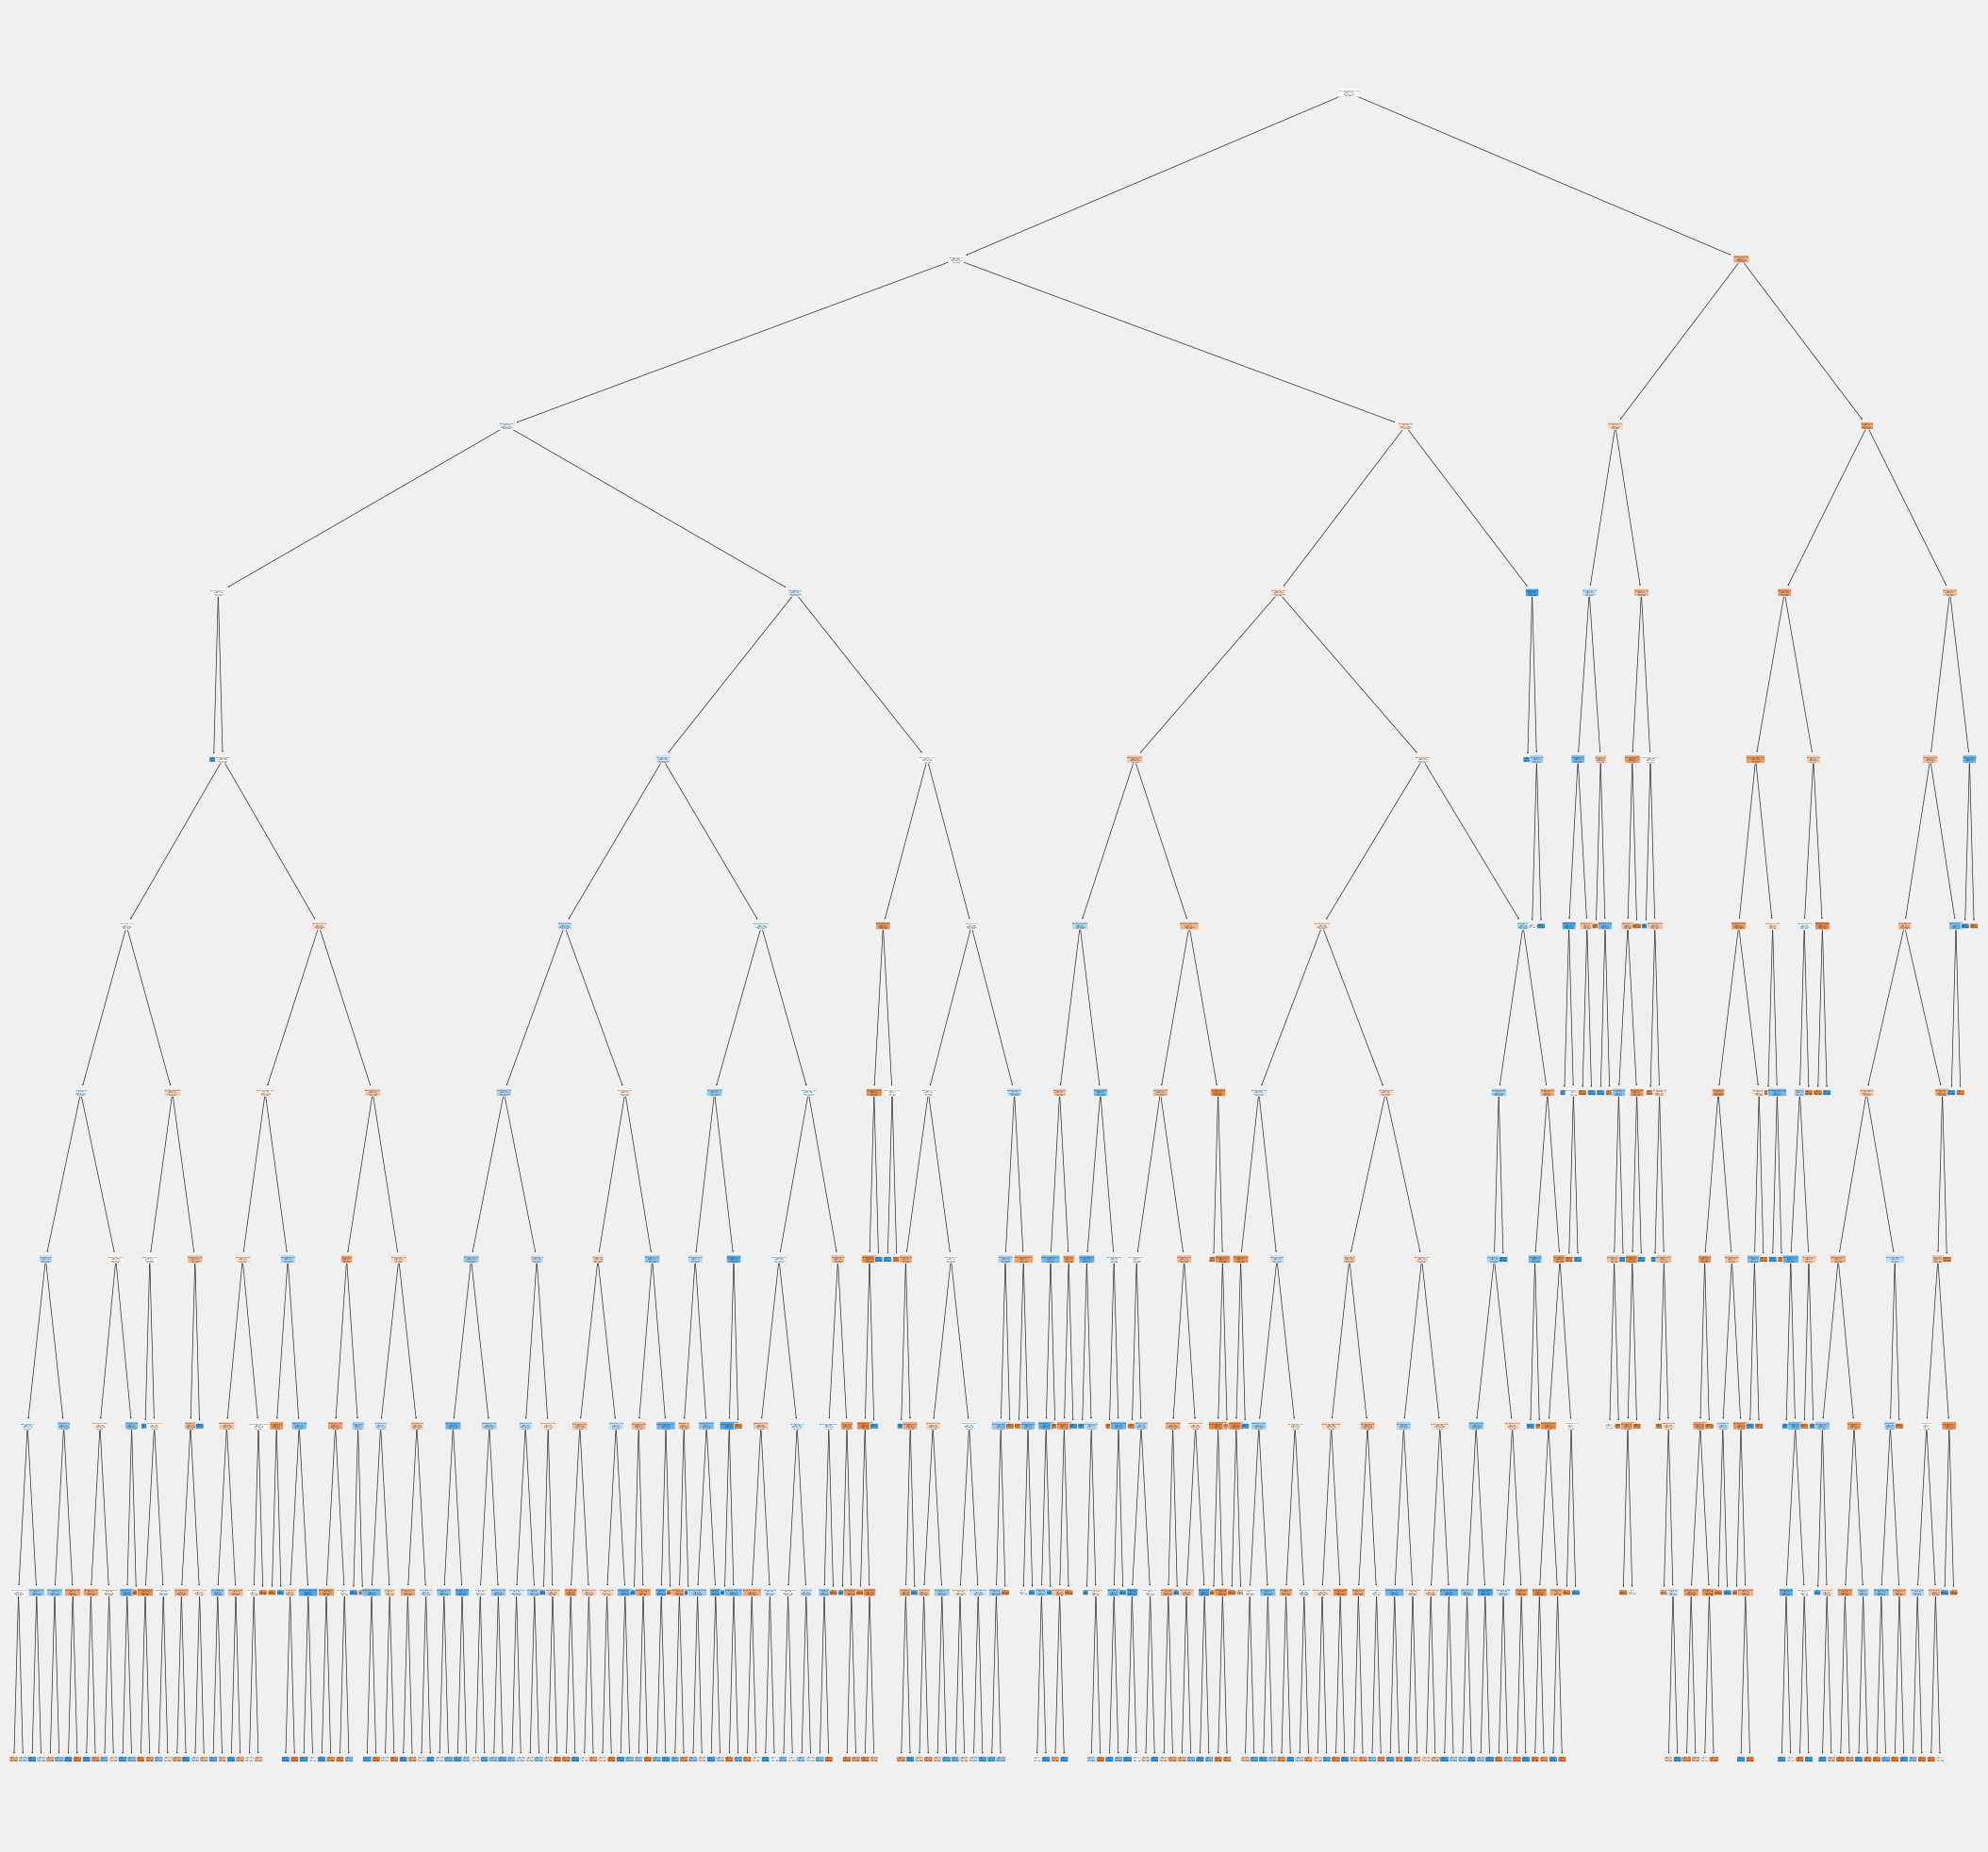

In [15]:
# Extract Response and Predictors
y = games['status']
X = games.drop('status', axis = 1)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 10)  
dectree.fit(X_train, y_train)                    

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["bad","good"])

Train Data
Accuracy  :	 0.6604678072567981

TPR Train :	 0.715300727032386
TNR Train :	 0.6055895485364644

FPR Train :	 0.39441045146353565
FNR Train :	 0.284699272967614


<AxesSubplot:>

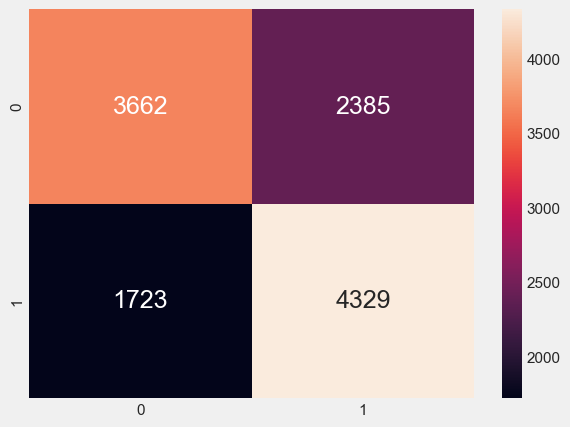

In [16]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.6178512396694215

TPR Test :	 0.652317880794702
TNR Test :	 0.5834983498349835

FPR Test :	 0.4165016501650165
FNR Test :	 0.347682119205298


<AxesSubplot:>

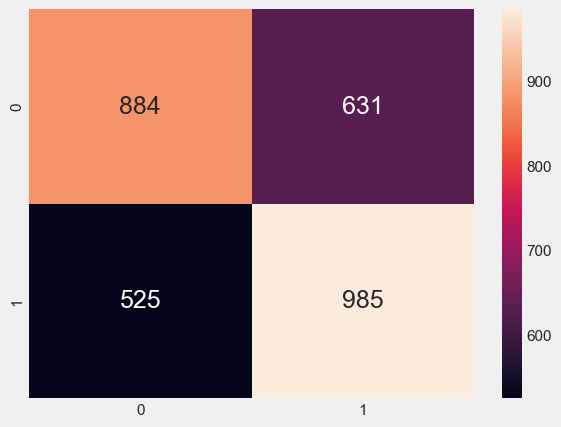

In [17]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})